In [1]:
import tensorflow as tf
import pandas as pd

import array 
import sklearn
from sklearn.metrics import confusion_matrix
import pylab as pl
import matplotlib.pyplot as plt

FilePath = "/home/nramvinojen/Programs/Workbench/24Jan2019/"
ext = ".jpg"

#RunFolder = "28Jan2019"
#FV_count = 100

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# If GPU is available: 
config = tf.ConfigProto()
config.log_device_placement = True
config.allow_soft_placement = True
config.gpu_options.allocator_type = 'BFC'

# Limit the maximum memory used
config.gpu_options.per_process_gpu_memory_fraction = 0.1

# set session config
tf.keras.backend.set_session(tf.Session(config=config))

In [3]:
# load json and create model
from keras.models import model_from_json
json_file = open(FilePath + "Dataset/ModelAndWeights/" + 'Classifier_DNN_100FV_8Class.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(FilePath + "Dataset/ModelAndWeights/" + "Classifier_DNN_100FV_8Class.h5")
print("Loaded model from disk")

Using TensorFlow backend.


Loaded model from disk


In [4]:
# load dataset
dataframe = pd.read_csv(FilePath + "Runs/" + RunFolder + "/RegressionOut/NegRemoved/" + "Target_test_FV100_Classifer.csv", header=None)
dataset = dataframe.values
X_ans = dataset[:,0:100].astype(float)


dataframe = pd.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/Test_Label.csv", header=None)
Ytest_temp = dataframe.values
Y_ans = Ytest_temp[:,0]

In [5]:
predictions = loaded_model.predict(X_ans)

In [6]:
print("Predicted Labels")
y_pred = [0] * len(Y_ans)
for i in range (len(Y_ans)):
    a=list(predictions[i])
    y_pred[i]= a.index(max(a))
    print(a.index(max(a)),end=" ")

Predicted Labels
6 3 4 2 3 2 2 6 2 6 3 4 4 4 3 2 3 4 2 4 6 2 4 4 2 2 3 4 4 2 5 4 4 4 3 6 3 3 3 4 4 4 5 3 4 3 3 3 6 6 4 3 2 3 6 4 4 3 4 6 6 6 3 3 4 3 2 5 3 6 4 3 

In [7]:
print("Actual Labels")
for i in range (len(Y_ans)):
    print(int(Y_ans[i]),end=" ")

Actual Labels
0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 

In [8]:
Y_test = Y_ans
cm = confusion_matrix(Y_ans, y_pred)
print("")
print(cm)


[[0 0 4 2 1 0 2 0]
 [0 0 1 3 4 0 1 0]
 [0 0 4 1 3 0 1 0]
 [0 0 1 1 5 1 1 0]
 [0 0 0 4 4 1 0 0]
 [0 0 1 5 1 0 2 0]
 [0 0 0 2 3 0 4 0]
 [0 0 1 4 2 1 1 0]]


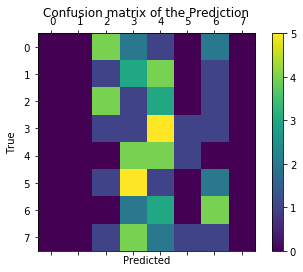

In [9]:
labels = [' 0', ' 1', ' 2', ' 3', ' 4', ' 5',' 6', ' 7']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Prediction')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels( [''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [10]:
target = ['0','1','2','3','4','5','6','7']

In [11]:
print ('\n Summary for each class:')
print (sklearn.metrics.classification_report(Y_ans, y_pred, target_names=target))


 Summary for each class:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         9
          1       0.00      0.00      0.00         9
          2       0.33      0.44      0.38         9
          3       0.05      0.11      0.06         9
          4       0.17      0.44      0.25         9
          5       0.00      0.00      0.00         9
          6       0.33      0.44      0.38         9
          7       0.00      0.00      0.00         9

avg / total       0.11      0.18      0.13        72



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
